In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import pickle
import os

# Simulation erneuern
path = os.getcwd()+"\\Simulationsergebnisse\\Simulation_Results_4_250k_CS2.pickle"
df = pickle.load(open(path, 'rb'))

In [38]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,3,563.0,38,590.0,27.0,8.45,8,100.0,96.5,NaN,NaN
1,0.2,2,3,4,598.0,40,624.0,26.0,8.13,34,96.5,93.2,NaN,NaN
2,0.3,3,4,3,658.0,44,695.0,37.0,11.71,36,93.2,88.4,NaN,NaN
3,0.4,4,3,4,731.0,49,747.0,16.0,5.06,7,88.4,86.3,NaN,NaN
4,0.5,5,4,3,754.0,50,806.0,52.0,16.52,346,86.3,79.5,NaN,NaN


## Filtern und Vorbereiten der Analyse

In [39]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [40]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
6,0.7,7,4,1,1273.0,85,1296.0,23.0,7.13,658,79.3,76.4,1296.0,1403.0
7,1.1,1,1,2,355.0,24,397.0,42.0,13.24,501,100.0,93.4,397.0,426.0
9,1.3,3,5,1,1078.0,72,1092.0,14.0,4.30,1385,71.9,69.8,1092.0,1225.0
13,2.4,4,4,1,1147.0,76,1151.0,4.0,1.20,59,83.2,82.5,1151.0,1210.0
15,2.6,6,4,1,1232.0,82,1329.0,97.0,30.63,144,95.1,76.9,1329.0,1434.0


In [41]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.7,7,4,1,1273.0,85,1296.0,23.0,7.13,658,79.3,76.4,1296.0,1403.0
1,1.1,1,1,2,355.0,24,397.0,42.0,13.24,501,100.0,93.4,397.0,426.0
2,1.3,3,5,1,1078.0,72,1092.0,14.0,4.30,1385,71.9,69.8,1092.0,1225.0
3,2.4,4,4,1,1147.0,76,1151.0,4.0,1.20,59,83.2,82.5,1151.0,1210.0
4,2.6,6,4,1,1232.0,82,1329.0,97.0,30.63,144,95.1,76.9,1329.0,1434.0


## Ermitteln der Anzahl ladender Fahrzeuge über Zeitverlauf

In [42]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
def calc_cars_charging(df_filt):
    # initialisieren Liste 
    cars_charging = [0 for i in range(1441)]
    for i in range(len(df_filt)):
        if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
            for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
                cars_charging[j] += 1
        else: 
            for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
                cars_charging[j] += 1
            for j in range(0, int(df_filt.at[i, "Charge_end"])):
                cars_charging[j] += 1
    return cars_charging

In [43]:
cars_charging_total = calc_cars_charging(df_filt)
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
relative_cars_charging_total = [x/250000 for x in cars_charging]

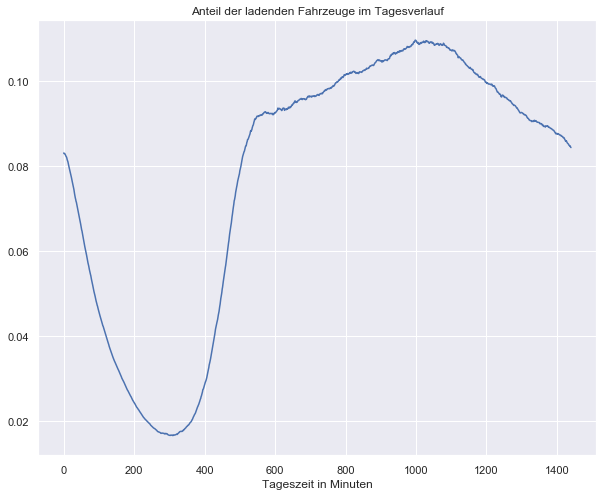

In [44]:
# Visualisieren
sns.set()
plt.figure(figsize=(10,8))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging_total);

## Anteiliges darstellen der Ladevorgänge nach Zustand

In [45]:
# Aufteilen des Datensatz nach Zustand in dem geladen wird

filt = df_filt["Whyto"] == 1
df_home = df_filt[filt]
df_home.reset_index(drop=True, inplace=True)

filt = df_filt["Whyto"] == 2
df_work = df_filt[filt]
df_work.reset_index(drop=True, inplace=True)

In [46]:
# berechnen der Anzahl an Fahrzeugen die laden

cars_charging_home = calc_cars_charging(df_home)
cars_charging_work = calc_cars_charging(df_work)

In [47]:
# normieren auf Gesamtanzahl simulierter Fahrzeuge

relative_cars_charging_home = [x/250000 for x in cars_charging_home]
relative_cars_charging_work = [x/250000 for x in cars_charging_work]

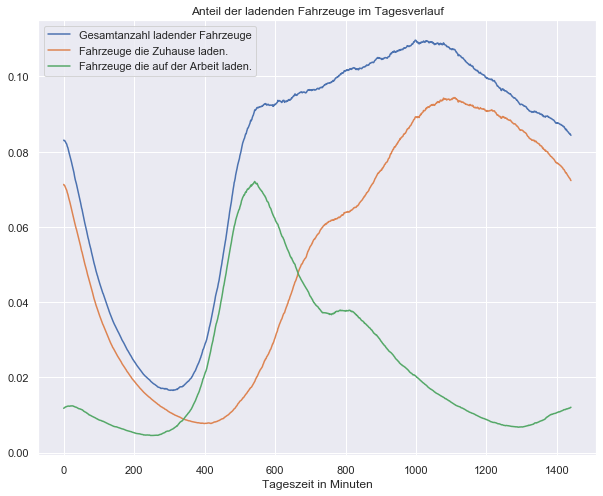

In [49]:
# Visualisieren des Ergebnisses

plt.figure(figsize=(10,8));
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf");
plt.xlabel("Tageszeit in Minuten");
plt.plot(x, relative_cars_charging_total, label="Gesamtanzahl ladender Fahrzeuge");
plt.plot(x, relative_cars_charging_home, label="Fahrzeuge die Zuhause laden.");
plt.plot(x, relative_cars_charging_work, label="Fahrzeuge die auf der Arbeit laden.");
plt.legend();